In [1]:
# Install dependencies as needed:
!pip install kagglehub[pandas-datasets]

In [2]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "2021 - 11 - ALS DB.xlsx"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "juanophillips/als-help-request-to-the-community",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:")
df.head()

/tmp/ipython-input-1980008446.py:8: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 545k/545k [00:00<00:00, 3.65MB/s]


First 5 records:


,SubjectUID,Age at Symptons Onset,Age at Death,Death,Site_of_Onset,Cohort,med,med_revised,Diagdt,OnsetYR,LNA_YR,Lenght_Diag_LNA,ALSFRS-R Baseline,ALSFRS-R Latest,Diff
0,NEUAA295HHE,50,0,NaN,Limb,ALS,B Complex Vitamins,B Complex Vitamins,No_Diag_DT,-1.887671,2.147945,0.0,43,32,-11
1,NEUAA295HHE,50,0,NaN,Limb,ALS,CoQ10,Coenzyme Q10,No_Diag_DT,-1.887671,2.147945,0.0,43,32,-11
2,NEUAA295HHE,50,0,NaN,Limb,ALS,Cyanocobalamin/Mecobalamin,Methyl vitamin B12,No_Diag_DT,-1.887671,2.147945,0.0,43,32,-11
3,NEUAA295HHE,50,0,NaN,Limb,ALS,Flaxseed oil,Flax Seeds,No_Diag_DT,-1.887671,2.147945,0.0,43,32,-11
4,NEUAA295HHE,50,0,NaN,Limb,ALS,heparin sodium,Sodium Heparin,No_Diag_DT,-1.887671,2.147945,0.0,43,32,-11


In [3]:
# Compute ALSFRS--R_start and ALSFRS--R_end rounding ALSFRS-R Baseline / 12 and ALSFRS-R Latest / 12
df['ALSFRS--R_start'] = round(df['ALSFRS-R Baseline'] / 12)
df['ALSFRS--R_end'] = round(df['ALSFRS-R Latest'] / 12)

# drop ALSFRS-R Baseline and ALSFRS-R Latest
df = df.drop(columns=['ALSFRS-R Baseline', 'ALSFRS-R Latest'])

Some data analysis

In [4]:
df.isna().sum()

# Great only deth has NaN values (as expected)

,0
SubjectUID,0
Age at Symptons Onset,0
Age at Death,0
Death,4360
Site_of_Onset,0
Cohort,0
med,0
med_revised,0
Diagdt,0
OnsetYR,0


In [5]:
df.describe()

,Age at Symptons Onset,Age at Death,OnsetYR,LNA_YR,Lenght_Diag_LNA,Diff,ALSFRS--R_start,ALSFRS--R_end
count,7051.000000,7051.000000,7051.000000,7051.000000,7051.000000,7051.000000,7051.000000,7051.000000
mean,55.576372,24.480499,-3.414469,1.045144,2.572914,-6.052900,2.706283,2.172458
std,14.688132,31.807720,4.876923,1.152762,3.700159,9.712456,0.930241,0.952808
min,0.000000,0.000000,-64.334247,-0.591781,-0.676712,-38.000000,0.000000,0.000000
25%,50.000000,0.000000,-3.816438,0.000000,0.317808,-11.000000,2.000000,2.000000
50%,57.000000,0.000000,-1.778082,0.783562,1.536986,-4.000000,3.000000,2.000000
75%,65.000000,60.000000,-1.032877,1.890411,3.405479,0.000000,3.000000,3.000000
max,88.000000,88.000000,0.000000,3.843836,39.646575,47.000000,4.000000,4.000000


In [6]:
# Following problems can be spotted:
# Age at Symptons Onset: min = 0
# Age at Death: min = 0

# Let's see these rows
df[df['Age at Symptons Onset'] == 0]
# df[df['Age at Death'] == 0]

,SubjectUID,Age at Symptons Onset,Age at Death,Death,Site_of_Onset,Cohort,med,med_revised,Diagdt,OnsetYR,LNA_YR,Lenght_Diag_LNA,Diff,ALSFRS--R_start,ALSFRS--R_end
72,NEUAE914RW2,0,0,NaN,Limb,ALS,micronor,Norethindrone,-9.89589,0.0,0.268493,10.164384,-1,1.0,1.0
73,NEUAE914RW2,0,0,NaN,Limb,ALS,acetylcysteine,Acetylcysteine,-9.89589,0.0,0.268493,10.164384,-1,1.0,1.0
74,NEUAE914RW2,0,0,NaN,Limb,ALS,CoQ10,Coenzyme Q10,-9.89589,0.0,0.268493,10.164384,-1,1.0,1.0
75,NEUAE914RW2,0,0,NaN,Limb,ALS,nudexta,Dextromethorphan / Quinidine,-9.89589,0.0,0.268493,10.164384,-1,1.0,1.0
76,NEUAE914RW2,0,0,NaN,Limb,ALS,radicava,Edaravone,-9.89589,0.0,0.268493,10.164384,-1,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6118,NEUWY742GEH,0,0,NaN,0,Asymptomatic ALS Gene carrier,Magnesium spray,Magnesium,0,0.0,1.446575,1.446575,0,3.0,3.0
6119,NEUWY742GEH,0,0,NaN,0,Asymptomatic ALS Gene carrier,Riluzole,Riluzole,0,0.0,1.446575,1.446575,0,3.0,3.0
6120,NEUWY742GEH,0,0,NaN,0,Asymptomatic ALS Gene carrier,TUDCA,Tauroursodeoxycholic acid,0,0.0,1.446575,1.446575,0,3.0,3.0
6121,NEUWY742GEH,0,0,NaN,0,Asymptomatic ALS Gene carrier,Vitamin D3,Cholecalciferol,0,0.0,1.446575,1.446575,0,3.0,3.0


In [7]:
# It seems Age at Death = 0 is not a problem as it occurrs when death is NaN
# Let's remove the records with Age at Symptons Onset == 0
df = df[df['Age at Symptons Onset'] != 0]

array([[<Axes: xlabel='Age at Symptons Onset', ylabel='Age at Symptons Onset'>,
        <Axes: xlabel='Age at Death', ylabel='Age at Symptons Onset'>,
        <Axes: xlabel='OnsetYR', ylabel='Age at Symptons Onset'>,
        <Axes: xlabel='LNA_YR', ylabel='Age at Symptons Onset'>,
        <Axes: xlabel='Lenght_Diag_LNA', ylabel='Age at Symptons Onset'>,
        <Axes: xlabel='Diff', ylabel='Age at Symptons Onset'>,
        <Axes: xlabel='ALSFRS--R_start', ylabel='Age at Symptons Onset'>,
        <Axes: xlabel='ALSFRS--R_end', ylabel='Age at Symptons Onset'>],
       [<Axes: xlabel='Age at Symptons Onset', ylabel='Age at Death'>,
        <Axes: xlabel='Age at Death', ylabel='Age at Death'>,
        <Axes: xlabel='OnsetYR', ylabel='Age at Death'>,
        <Axes: xlabel='LNA_YR', ylabel='Age at Death'>,
        <Axes: xlabel='Lenght_Diag_LNA', ylabel='Age at Death'>,
        <Axes: xlabel='Diff', ylabel='Age at Death'>,
        <Axes: xlabel='ALSFRS--R_start', ylabel='Age at Death'>,
    

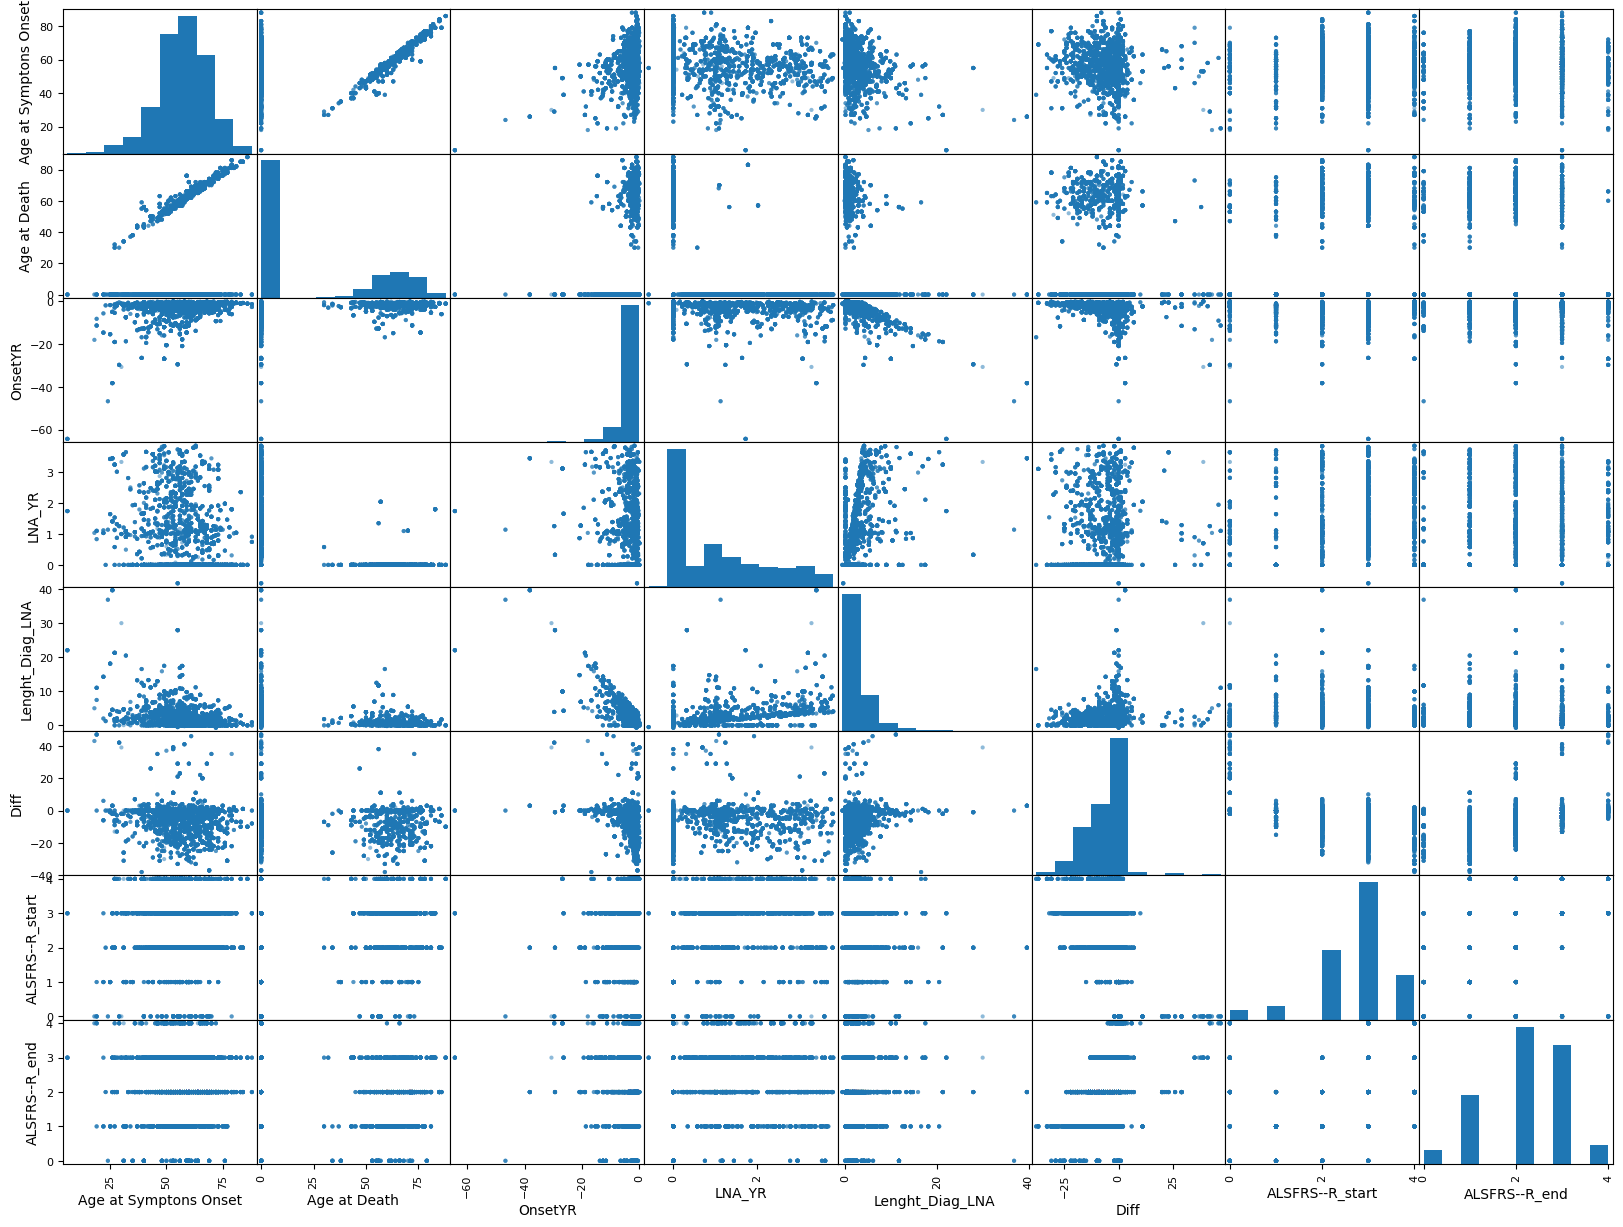

In [8]:
# Let's see a little bit of correlations between variables

import numpy as np
from pandas.plotting import scatter_matrix

scatter_matrix(df.select_dtypes(include=['number']), figsize=(20, 15))

In [9]:
# Age at Symptons Onset and Age at Death are really correlated, exept for alive patients, we will keep only Age at Symptons Onset
df = df.drop(columns=['Age at Death'])

In [10]:
df.head()

,SubjectUID,Age at Symptons Onset,Death,Site_of_Onset,Cohort,med,med_revised,Diagdt,OnsetYR,LNA_YR,Lenght_Diag_LNA,Diff,ALSFRS--R_start,ALSFRS--R_end
0,NEUAA295HHE,50,NaN,Limb,ALS,B Complex Vitamins,B Complex Vitamins,No_Diag_DT,-1.887671,2.147945,0.0,-11,4.0,3.0
1,NEUAA295HHE,50,NaN,Limb,ALS,CoQ10,Coenzyme Q10,No_Diag_DT,-1.887671,2.147945,0.0,-11,4.0,3.0
2,NEUAA295HHE,50,NaN,Limb,ALS,Cyanocobalamin/Mecobalamin,Methyl vitamin B12,No_Diag_DT,-1.887671,2.147945,0.0,-11,4.0,3.0
3,NEUAA295HHE,50,NaN,Limb,ALS,Flaxseed oil,Flax Seeds,No_Diag_DT,-1.887671,2.147945,0.0,-11,4.0,3.0
4,NEUAA295HHE,50,NaN,Limb,ALS,heparin sodium,Sodium Heparin,No_Diag_DT,-1.887671,2.147945,0.0,-11,4.0,3.0


Analyse Categorical variables

In [11]:
# drop med as we have already med_revised
df = df.drop(columns=['med'])

In [12]:
import plotly.express as px

def plot_violin(df, y_column, x_column):
  return px.violin(df, x=x_column, y=y_column, color=x_column, title=f'{y_column} by {x_column}')

In [13]:
plot_violin(df, 'ALSFRS--R_start', 'Site_of_Onset')

In [14]:
plot_violin(df, 'ALSFRS--R_start', 'Cohort')

Create a new dataframe with ALSFRS--R_start and only relevant column for ALSFRS--R at t0

In [15]:
# Create new dataframe without med_revised and Diagdt and SubjectUID

df_0 = df.drop(columns=['med_revised', 'Diagdt', 'SubjectUID', 'Death'])
df_0.describe()

,Age at Symptons Onset,OnsetYR,LNA_YR,Lenght_Diag_LNA,Diff,ALSFRS--R_start,ALSFRS--R_end
count,6859.000000,6859.000000,6859.000000,6859.000000,6859.000000,6859.000000,6859.000000
mean,57.132089,-3.510048,1.056056,2.605865,-6.095932,2.698936,2.162706
std,11.527658,4.910674,1.156413,3.720797,9.716939,0.921638,0.935545
min,6.000000,-64.334247,-0.591781,-0.676712,-38.000000,0.000000,0.000000
25%,50.000000,-3.868493,0.000000,0.326027,-12.000000,2.000000,2.000000
50%,58.000000,-1.800000,0.786301,1.594521,-4.000000,3.000000,2.000000
75%,65.000000,-1.090411,1.901370,3.421918,0.000000,3.000000,3.000000
max,88.000000,0.000000,3.835616,39.646575,47.000000,4.000000,4.000000


Let us create a NN with cathegorical cross entropy as loss (multiclass classification)

In [16]:
# First create dummy variables for categorical columns
import pandas as pd

df_0 = pd.get_dummies(df_0, columns=['Site_of_Onset', 'Cohort'], dtype=float)
df_0.head()

,Age at Symptons Onset,OnsetYR,LNA_YR,Lenght_Diag_LNA,Diff,ALSFRS--R_start,ALSFRS--R_end,Site_of_Onset_0,Site_of_Onset_Axial,Site_of_Onset_Bulbar,Site_of_Onset_Limb,Site_of_Onset_Multiple,Site_of_Onset_Other,Cohort_ALS,Cohort_Non-ALS MND
0,50,-1.887671,2.147945,0.0,-11,4.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,50,-1.887671,2.147945,0.0,-11,4.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,50,-1.887671,2.147945,0.0,-11,4.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,50,-1.887671,2.147945,0.0,-11,4.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,50,-1.887671,2.147945,0.0,-11,4.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [17]:
from sklearn.model_selection import train_test_split
n_classes = 5

# Make sure values are positive and normalized
X = np.abs(df_0.drop(columns=['ALSFRS--R_start', 'ALSFRS--R_end']).to_numpy())
X = X / X.max(axis=0)
print(X)

# Create labels
target = df_0['ALSFRS--R_start'].to_numpy()
y = np.zeros((target.shape[0], n_classes))
for i in range(y.shape[0]):
    class_ = int(target[i])
    y[i, class_] = 1
print(y)

[[0.56818182 0.02934162 0.56       ... 0.         1.         0.        ]
 [0.56818182 0.02934162 0.56       ... 0.         1.         0.        ]
 [0.56818182 0.02934162 0.56       ... 0.         1.         0.        ]
 ...
 [0.68181818 0.01933396 0.25214286 ... 0.         1.         0.        ]
 [0.68181818 0.01933396 0.25214286 ... 0.         1.         0.        ]
 [0.68181818 0.01933396 0.25214286 ... 0.         1.         0.        ]]
[[0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


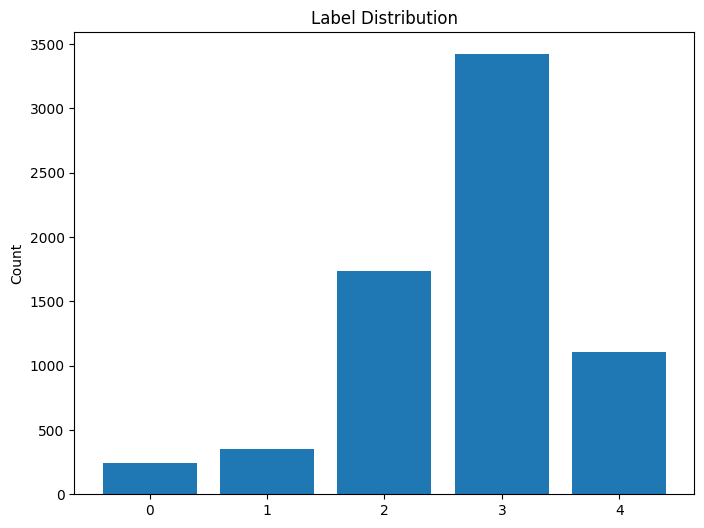

[ 244.  352. 1736. 3420. 1107.]


In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar(range(1, y.shape[1] + 1), np.sum(y, axis=0))
plt.xticks(range(1, y.shape[1] + 1), labels=range(n_classes))
plt.ylabel('Count')
plt.title('Label Distribution')
plt.show()

# print label count for each class
print(np.sum(y, axis=0))

In [20]:
#Pretty uneven, compute class weights
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(target), y=target)

# format as a dict class: weight
class_weights = dict(enumerate(class_weights))
print(class_weights)

{0: np.float64(5.622131147540983), 1: np.float64(3.8971590909090907), 2: np.float64(0.7902073732718894), 3: np.float64(0.4011111111111111), 4: np.float64(1.2392050587172538)}


In [21]:
# Split train and val with stratification for ensuring correct handling of uneven classes

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=target)

print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(5487, 13)
(1372, 13)
(5487, 5)
(1372, 5)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_23 (Dense)                │ (None, 512)            │         7,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 174,085 (680.02 KB)

 Trainable params: 173,061 (676.02 KB)

 Non-trainable params: 1,024 (4.00 KB)

Epoch 1/1000
172/172 - 5s - 27ms/step - accuracy: 0.3189 - loss: 1.4329 - val_accuracy: 0.4322 - val_loss: 1.6091
Epoch 2/1000
172/172 - 2s - 11ms/step - accuracy: 0.3614 - loss: 1.3172 - val_accuracy: 0.3644 - val_loss: 1.5459
Epoch 3/1000
172/172 - 1s - 7ms/step - accuracy: 0.3725 - loss: 1.2804 - val_accuracy: 0.3827 - val_loss: 1.4490
Epoch 4/1000
172/172 - 1s - 7ms/step - accuracy: 0.3835 - loss: 1.2558 - val_accuracy: 0.4009 - val_loss: 1.3786
Epoch 5/1000
172/172 - 1s - 7ms/step - accuracy: 0.3911 - loss: 1.2514 - val_accuracy: 0.3950 - val_loss: 1.3538
Epoch 6/1000
172/172 - 1s - 7ms/step - accuracy: 0.3831 - loss: 1.2465 - val_accuracy: 0.3958 - val_loss: 1.3506
Epoch 7/1000
172/172 - 1s - 7ms/step - accuracy: 0.3831 - loss: 1.2367 - val_accuracy: 0.3994 - val_loss: 1.3462
Epoch 8/1000
172/172 - 2s - 11ms/step - accuracy: 0.3966 - loss: 1.2246 - val_accuracy: 0.4140 - val_loss: 1.3377
Epoch 9/1000
172/172 - 2s - 12ms/step - accuracy: 0.3951 - loss: 1.2270 - val_accuracy: 0.416

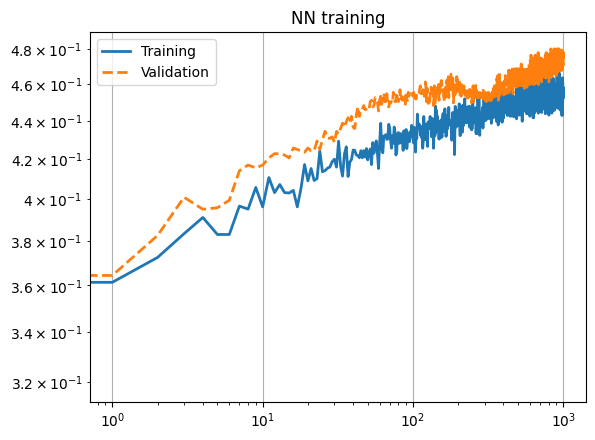

In [34]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
import numpy as np

lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  0.001,    #0.05               best with 0.001
  decay_steps=50, #100        best with 100
  decay_rate=5, #1              best with 1
  staircase=False)

def get_optimizer():
    return tf.keras.optimizers.Adam(lr_schedule)

def get_callbacks(name):
    return [
        tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=200, min_delta=0.001),
        ]

def compile_and_fit(model, name, x_train, y_train, x_test, y_test, optimizer=None, max_epochs=100):

    if optimizer is None:
        optimizer = get_optimizer()

    model.compile(optimizer=optimizer,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

    model.summary()

    history = model.fit(
            x_train, y_train,
            epochs=max_epochs,
            # batch_size=500,
            validation_data=(x_test, y_test),
            callbacks=get_callbacks(name),
            class_weight=class_weights,
            verbose=2)

    return history

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

INPUTDIM = X_train.shape[1]
OUTPUTDIM = y_train.shape[1]

n_train=X_train.shape[0]
n_val=X_val.shape[0]

dropout= 0.05
reg = 0.0001

NN = tf.keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=(INPUTDIM,),kernel_regularizer = regularizers.l2(reg)),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu', kernel_regularizer = regularizers.l2(reg)),
    layers.Dropout(dropout),
    layers.Dense(128, activation='relu', kernel_regularizer = regularizers.l2(reg)),
    layers.Dropout(dropout),
    layers.Dense(OUTPUTDIM, activation='softmax')
])

history = compile_and_fit(NN, 'NN',X_train, y_train, X_val, y_val, max_epochs=1000)

bc     = history.history['accuracy']
val_bc = history.history['val_accuracy']

plt.loglog(range(np.shape(bc)[0]),bc, linewidth=2,)
plt.loglog(range(np.shape(val_bc)[0]),val_bc,'--', linewidth=2,)
plt.title('NN training')
plt.grid(True)
#plt.show(block=False)

plt.legend(('Training','Validation'))
plt.show()

215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
F1 score: 0.47263717069827865


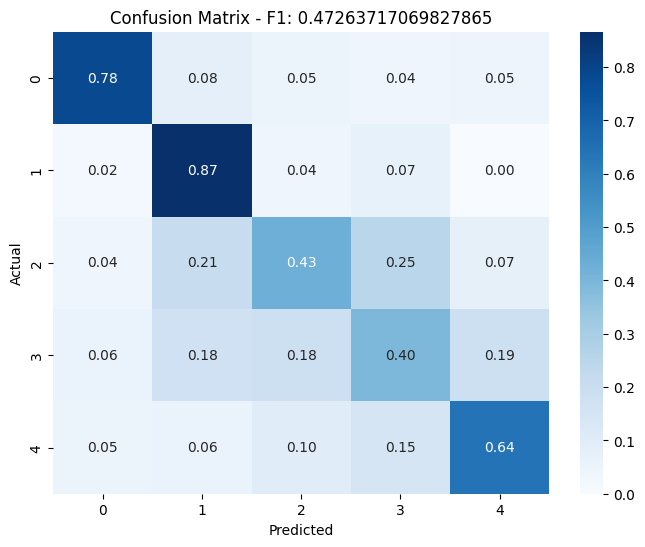

In [35]:
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns

# Example true labels and predicted labels
y_true = np.argmax(np.concatenate((y_val, y_train)), axis=-1)
y_pred = np.argmax(NN.predict(np.concatenate((X_val, X_train))), axis=-1)

# Compute the f1 score
f1 = f1_score(y_true, y_pred, average='macro')
print('F1 score:', f1)

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=range(n_classes), normalize='true')

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', xticklabels=range(n_classes), yticklabels=range(n_classes))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - F1: {f1}')
plt.show()

172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


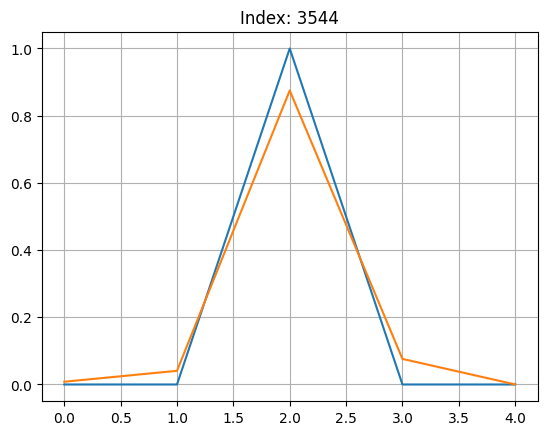

In [40]:
index = np.random.randint(0, n_train)

plt.figure()
plt.plot(y_train[index, :])
plt.plot(NN.predict(X_train)[index])
plt.title(f'Index: {index}')
plt.grid(True)
plt.show()